In [4]:
import pandas as pd
import json
from utils.common.os_util import load_all_txt

In [71]:
def extract(origin_txt: str) -> json:
    lines = origin_txt.split('\n')

    # Create an empty dictionary to store key-value pairs
    data_dict = {}

    # Iterate through each line and extract key-value pairs
    for index, line in enumerate(lines):
        if "Summary:" in line:
            data_dict['Summary'] = line.replace("Summary:", "")

        elif "Content:" in line:
            data_dict['Content'] = ". ".join(lines[index + 1:])
            break
        

    # Convert the dictionary to JSON format
    json_data = json.dumps(data_dict, ensure_ascii=False, indent=2)
    return json.loads(json_data)

FOLDER_PATH = 'datasets/ViMs/original'
data = load_all_txt(folder_path=FOLDER_PATH)
data = [extract(origin_txt) for origin_txt in data]


In [72]:
FOLDER_PATH = 'datasets/ViMs/original'
data = load_all_txt(folder_path=FOLDER_PATH)
data = [extract(origin_txt) for origin_txt in data]

In [64]:
df_data = pd.DataFrame(data)

In [65]:
df_data.describe()

,Source,Summary,Content
count,1945,1945,1945
unique,62,1891,1944
top,,,Brandon Cipes – phó chủ tịch hệ thống thông ti...
freq,1780,45,2


In [68]:
data

[{'Source': '',
  'Summary': ' Đoàn Văn Chuyên, tài xế xe tải kéo lê Thượng úy CSGT Nguyễn Quốc Đạt 20m dưới đường, bị TAND TP Hà Nội tuyên phạt 18 năm tù về tội danh “Giết người”.',
  'Content': 'Ngày 1/6, TAND TP Hà Nội mở phiên tòa sơ thẩm xét xử Đoàn Văn Chuyên (SN 1991, ở xã Vĩnh Khúc, huyện Văn Giang, Hưng Yên) về tội danh “Giết người”.. Cáo trạng của Viện KSND TP Hà Nội xác định, khoảng 9h ngày 12/12/2015, Đoàn Văn Chuyên điều khiểu xe ô tô BKS 89L-0211 đi trên đường Nguyễn Văn Linh, hướng từ Hải Phòng - Hà Nội. Đến khu vực ngã tư Sài Đồng - Nguyễn Văn Linh (quận Long Biên, Hà Nội), xe của Chuyên vi phạm luật giao thông nên bị Thượng úy Nguyễn Quốc Đạt (Đội CSGT số 5 - Phòng PC67, CATP Hà Nội) ra hiệu lệnh dừng xe để kiểm tra.. Thay vì chấp hành hiệu lệnh của CSGT, Chuyên điều khiển xe đâm thẳng vào Thượng úy Đạt. Gặp tình huống bất ngờ, Thượng úy Đạt vội nhảy lên, bám vào cần gạt nước ở kính chắn gió đầu xe ô tô, tiếp tục ra yêu cầu Chuyên dừng xe. Không những không dừng xe, Ch

In [45]:
df_data['count_Content'] = df_data['Content'].apply(lambda x: len(x))
df_data['count_Summary'] = df_data['Summary'].apply(lambda x: len(x))

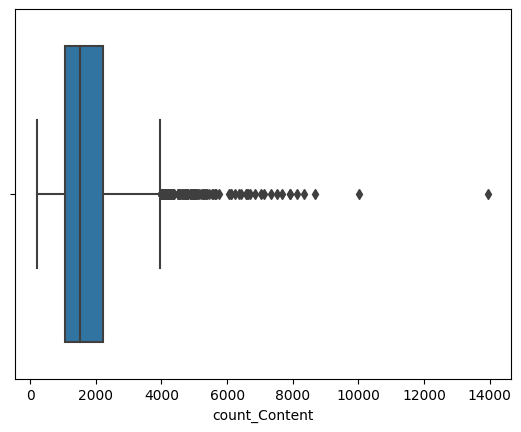

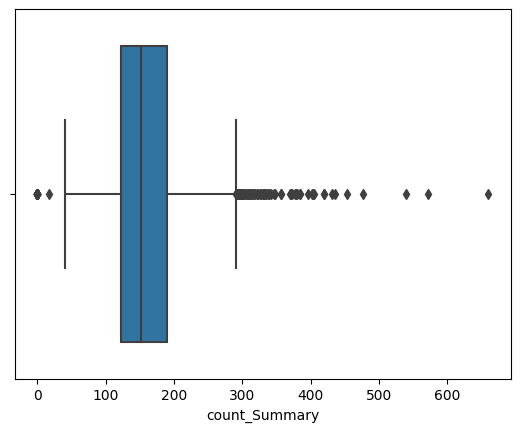

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Use Seaborn to create a box plot
sns.boxplot(x=df_data['count_Content'])
# Show the plot
plt.show()
sns.boxplot(x=df_data['count_Summary'])
# Show the plot
plt.show()


### Note
- In this scope, we only can use 5k tokens ~ 8000 character -> filter
- In this data, the existing some data be null, empty -> filter

### Remove outliner

In [58]:
filtered = df_data[(df_data['count_Content'] <= 8000) & (df_data['count_Content'] > 0) & (df_data['count_Summary'] > 100)]


In [59]:
filtered.describe()

,count_Content,count_Summary
count,1741.000000,1741.000000
mean,1863.788053,172.444572
std,1129.016289,57.853451
min,219.000000,101.000000
25%,1102.000000,134.000000
50%,1553.000000,160.000000
75%,2249.000000,195.000000
max,7918.000000,660.000000


In [61]:
filtered.to_csv("datasets/cleaned-summary-vietnamese_17_11_2023.csv")